In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings

In [2]:
df = pd.read_csv('Truly_Encoded_historical_data.csv')
df.head()

,Temperature,Cloudiness,Weather_Main_encoded
0,0.492438,0.82,0.182222
1,0.637893,0.18,0.040000
2,0.569074,0.07,0.000000
3,0.576551,1.00,0.222222
4,0.597111,0.82,0.182222


In [3]:
df.describe()

,Temperature,Cloudiness,Weather_Main_encoded
count,1800.000000,1800.000000,1800.000000
mean,0.618087,0.643283,0.255642
std,0.155670,0.361065,0.265589
min,0.000000,0.000000,0.000000
25%,0.495624,0.320000,0.083889
50%,0.611045,0.750000,0.188889
75%,0.753653,0.980000,0.222222
max,1.000000,1.000000,1.000000


In [4]:
df.shape

(1800, 3)

In [5]:
X = df.iloc[:,:].values
X

array([[0.4924384 , 0.82      , 0.18222222],
       [0.63789295, 0.18      , 0.04      ],
       [0.56907392, 0.07      , 0.        ],
       ...,
       [0.40458794, 0.95      , 0.21111111],
       [0.45913339, 1.        , 0.77777778],
       [0.47204758, 0.96      , 0.21333333]])

In [6]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

C:\Users\kumar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kumar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kumar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\k

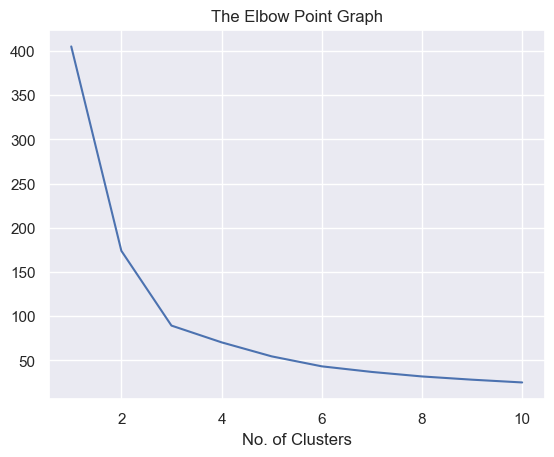

In [7]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('No. of Clusters')
plt.show()

In [8]:
kmeans = KMeans(n_clusters= 4,init='k-means++', random_state=50 )
y = kmeans.fit_predict(X)
y

C:\Users\kumar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 2, ..., 1, 0, 1])

In [9]:
df.head()

,Temperature,Cloudiness,Weather_Main_encoded
0,0.492438,0.82,0.182222
1,0.637893,0.18,0.040000
2,0.569074,0.07,0.000000
3,0.576551,1.00,0.222222
4,0.597111,0.82,0.182222


In [10]:
pca = PCA(2)

In [11]:
df = pca.fit_transform(df)

In [20]:
df1 = df.copy()

In [21]:
df1 = pd.DataFrame(df1)

In [22]:
df1.head()

,0,1
0,0.133598,-0.147497
1,-0.507436,0.041715
2,-0.612534,0.063561
3,0.297013,-0.204483
4,0.119468,-0.150654


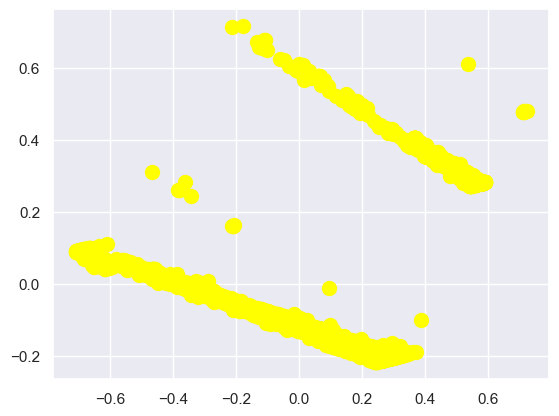

In [27]:
plt.scatter(df1[0], df1[1], s=100, c = 'yellow')
plt.show()

In [13]:
df.shape

(1800, 2)

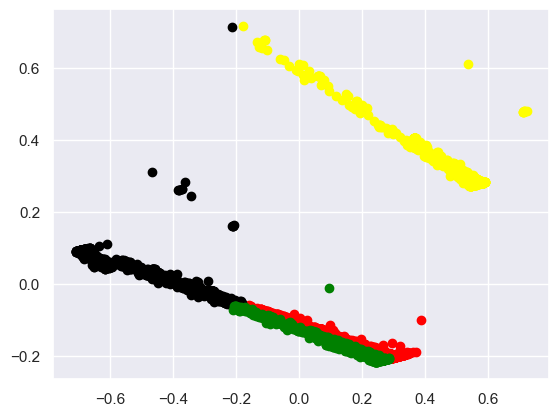

In [15]:
filtered_label2 = df[y == 1]
 
filtered_label1 = df[y == 0]
filtered_label3 = df[y == 2]
filtered_label4 = df[y == 3]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'black')
plt.scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = 'green')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'yellow')
plt.show()

In [16]:
from sklearn.metrics import silhouette_score
silhouette_score(df,y)

0.36642003378349763

In [9]:
df['Cluster'] = y

In [10]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]
df4 = df[df.Cluster == 3]

In [11]:
df.describe()

,Temperature,Cloudiness,Weather_Main_encoded,Cluster
count,1800.000000,1800.000000,1800.000000,1800.000000
mean,0.618087,0.643283,0.255642,1.512778
std,0.155670,0.361065,0.265589,1.006291
min,0.000000,0.000000,0.000000,0.000000
25%,0.495624,0.320000,0.083889,1.000000
50%,0.611045,0.750000,0.188889,2.000000
75%,0.753653,0.980000,0.222222,2.000000
max,1.000000,1.000000,1.000000,3.000000


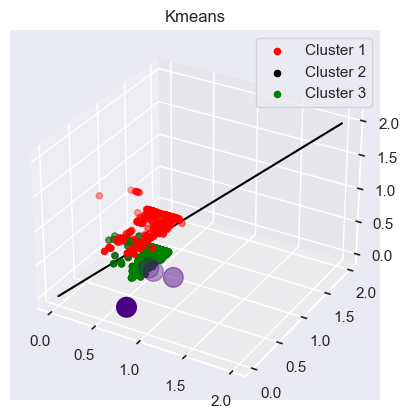

In [17]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 2, 1000)
yline = np.linspace(0, 2, 1000)
zline = np.linspace(0, 2, 1000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(df1.Temperature, df1.Cloudiness, df1.Weather_Main_encoded, c='red', label = 'Cluster 1')
kplot.scatter3D(df2.Temperature, df2.Cloudiness, df2.Weather_Main_encoded, c='black', label = 'Cluster 2')
kplot.scatter3D(df2.Temperature, df2.Cloudiness, df2.Weather_Main_encoded, c='green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'indigo', s = 200)
plt.legend()
plt.title("Kmeans")
plt.show()